# EDA란?
- **Understand the problem**
    - 각 variable의 의미와 문제에서의 중요도를 살펴보자

- **Univariable study**
    - dependent variable Y에 대해서 알아보자

- **Multivariate study**
    - dependent variable과 independent variable 사이의 관계를 알아보자

- **Basic cleaning**
    - missing data, outliers 그리고 categorical variables을 다뤄서 dataset을 정리해보자

- **Test assumptions**
    - data가 대부분의 multivariate technique들이 필요로하는 가정들에 부합하는지 확인해보자

# House Price Dataset

Kaggle 대회 중 Regression의 대표 문제로, 집값을 예측하는 문제입니다.    
먼저, House Price 데이터셋에 대한 EDA를 통해 후에 머신 러닝 모델에 사용할 피처와 데이터 샘플을 결정해봅시다.

하기 링크를 참고하시면서 여러가지 데이터 분석을 진행해주세요.    
[링크]https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [2]:
import os
os.chdir('../')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
#bring in the six packs
df_train = pd.read_csv('./data/house_price.csv')

In [4]:
df_train.shape

(1460, 81)

In [3]:
#check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 데이터를 볼때 생각할 것
- 우리가 집을 살때 이런 요소들을 고려하는가?
- 맞다면 이건 얼마나 중요한가?
- 이 정도가 이미 다른 변수에 설명되어있지는 않은가?

### Data 정리할 때 유용한 방식
#### Excel spreadsheet로 다음의  column을 정리한다
1. **Variable** - Variable name
2. **Type** - numerical or categorical type
3. **Segment** - Identification of the variables' type. (이 경우엔 building, space or location으로 구분 가능)
4. **Expectation** - Our expectation about the variable influence in 'SalePrice'
5. **Conclusion** - Our conclusions about the importance of the variable
6. **Comments** - Any general comments

#### 위의 kernel 작성자가 생각한 중요한 variables
- **OverallQual** (building seg)
- **YearBuilt** (building seg)
- **TotalBsmtSF** (space seg)
- **GrLivArea** (space seg)

In [4]:
#descriptive statistics summary
df_train['SalePrice'].describe()

# min is larger than zero! Excellent! model을 망칠 수 있는 SalePrice 데이터는 없어보인다

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

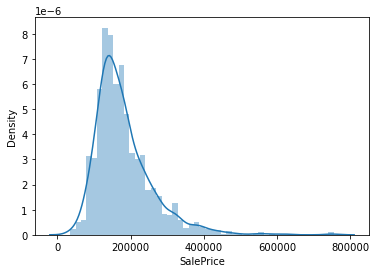

In [5]:
#histogram
sns.distplot(df_train['SalePrice'])

#### distribution을 확인했으니까 다음 세가지도 확인해보자

- 정규 분포에서 얼만큼 떨어져있는지
- 치우쳐진 정도가 적당한지
- peakedness 또한 확인해보기

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


#### 범주형 피처들 사이의 관계 확인해보기

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

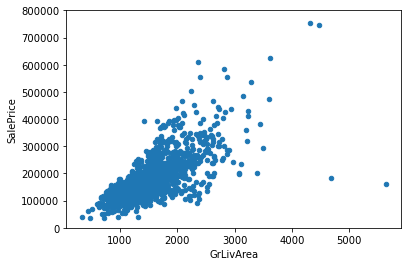

In [7]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

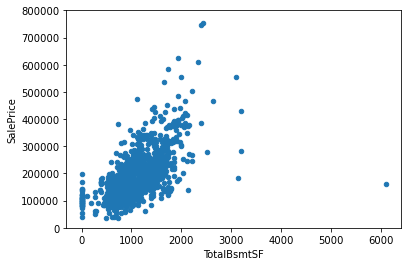

In [8]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

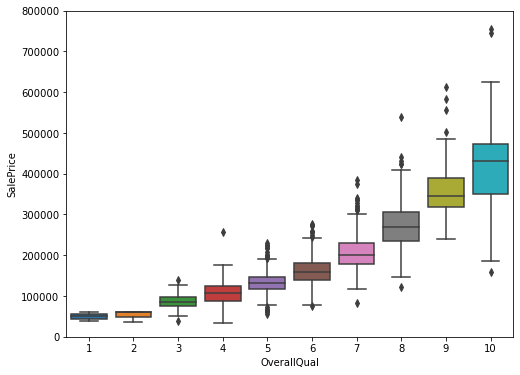

In [9]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) # f=figure, ax=axes.Axes
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

## Boxplot 해석 방법
- 네모 박스에서 맨위의 선은 75th percentile, 중간선은 median, 아래선은 25th percentile을 각각 의미한다. 
- 또한 IQR 이란 네모 박스의 길이로, 25th percentile ~ 75th percentile 까지의 길이를 의미한다.
- 네모 박스의 양 끝에서 1.5 IQR 길이만큼 떨어진 구간을 threshold로 잡아, 그 안에 속하는 observation 중 최대와 최소 값을 그린다.
- threshold를 넘어선 observation은 outlier로 취급해 점만 찍어준다.

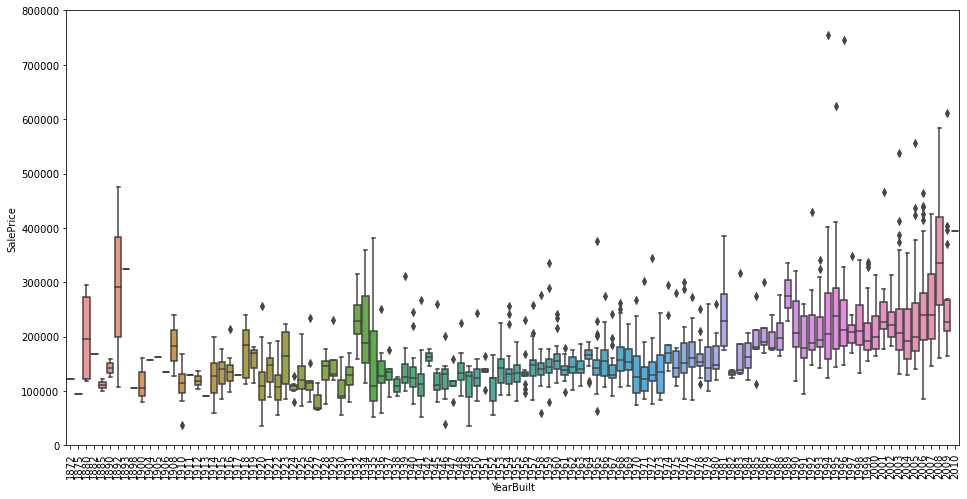

In [10]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

### 잠깐 너무 주관적으로 생각해서 분석한거 아니야?
차분하고 꼼꼼하게 분석해보자 우리!

- Correlation matrix (heatmap style)
- 'SalePrice' correlation matrix (zoomed heatmap style)
- Scatter plots between the most correlated variables (move like Jagger style)

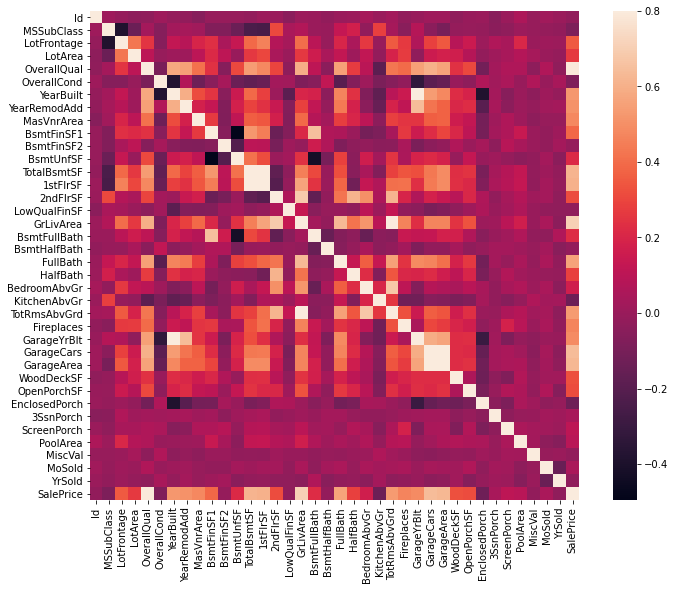

In [11]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True);

위 **heatmap**에서 집중해야할 부분은 높은 correlation을 보이는 변수들과 **'SalePrice'** 와의 높은 correlation을 보이는 변수를 찾는 것임!

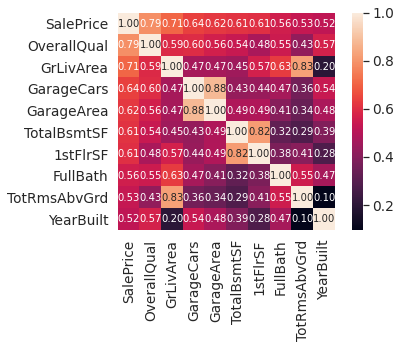

In [12]:
#saleprice correlation matrix (zoomed heatmap style)
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size':10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

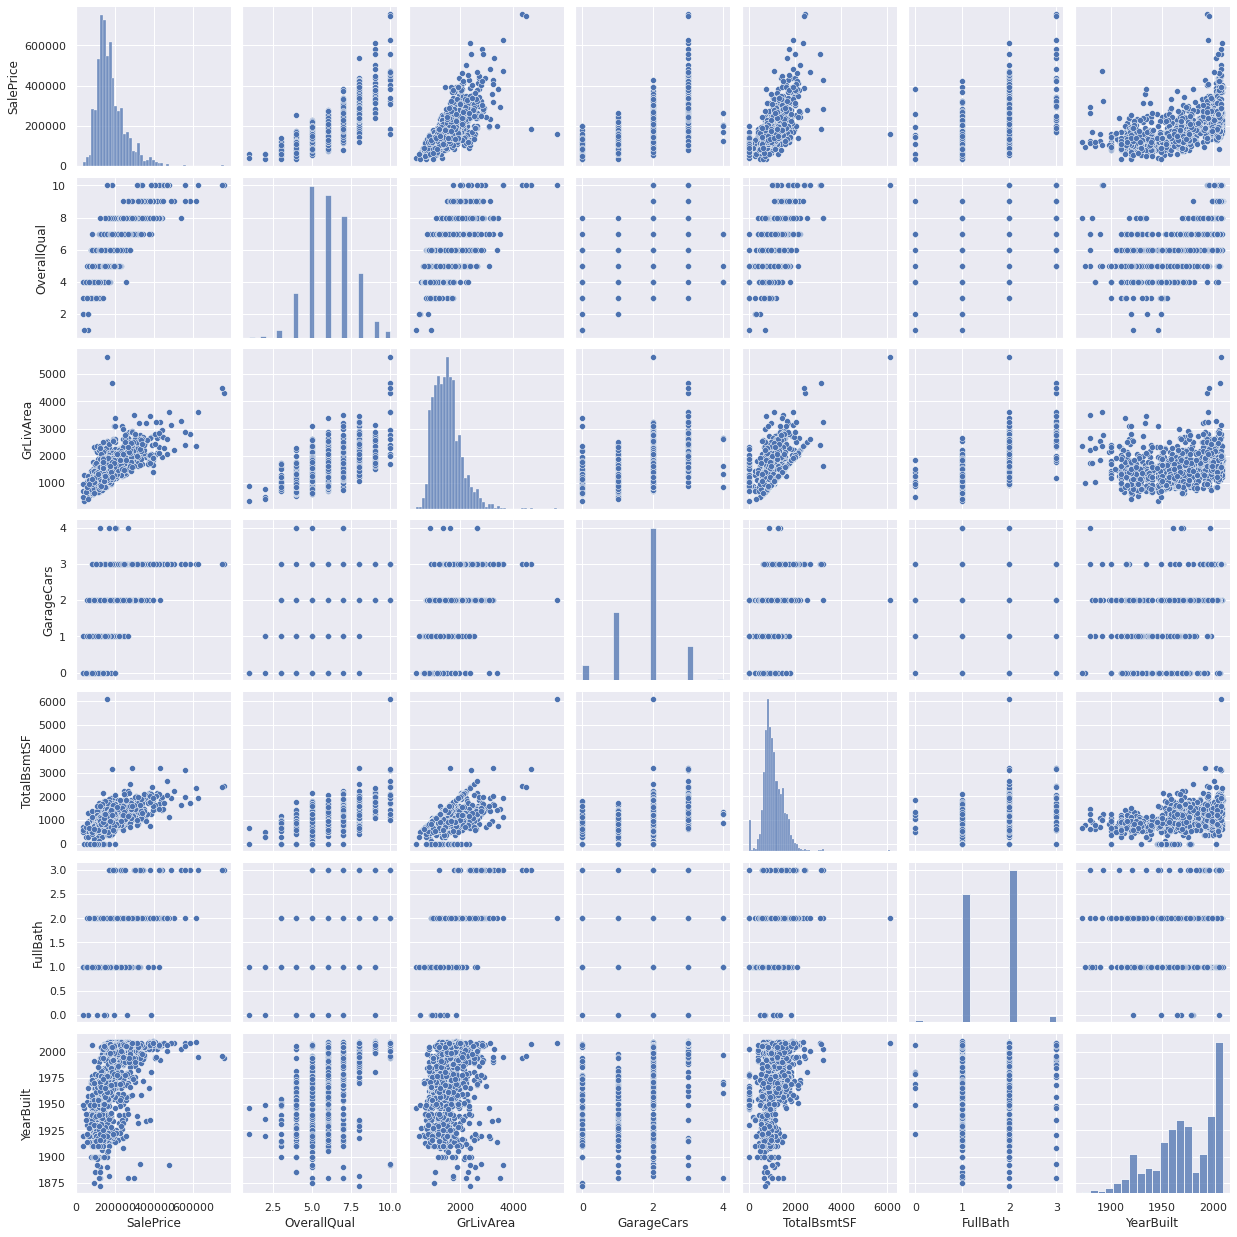

In [13]:
#scatterplot between 'SalePrice' and correlated variables
sns.set()
#highly correlated variables remove!
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
        'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

- 대각선에는 해당 variable의 데이터 히스토그램이 그려진다.
- 나머지 grid에는 각 row, column 변수들간의 scatterplot이 그려진다.

### Missing data
- missing data가 얼마나 자주 일어나냐?
- missing data가 random으로 혹은 일정 pattern을 가지느냐?

In [14]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#### Rule을 정해야한다
**15% of data가 유실된 경우**에는 해당 변수를 아예 없애주는 방법을 취할 수 있다
이때, 해당 변수가 직관적으로나 이전에 진행했던 분석에서 유용한 변수였는지 판단하는 것이 필요하다

위의 경우에서는 `Garage~`, `Bsmt~` 변수들은 이전에 고려하기로 했던 `GarageCars`, `TotalBsmtSF` 변수와 유사한 변수들이므로 또 제거

`MasVnt~` 변수는 중요도가 엄청 낮고, 이미 고려할 변수들과 높은 상관관계를 가지고 있으므로 제거

`Electrical` 변수의 경우 변수는 그대로 두되, 1개밖에 missing이 일어나지 않았으므로 해당 observation만 제거

In [15]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing

0

### Outliers 
model에 큰 영향을 미칠 수 있고, 특별한 행동에 대한 insight를 줄 수도 있다는 점에서 귀중한 정보가 될 수도 있다.

#### Univariate analysis
observation이 outlier인지 아닌지를 결정할 threshold를 성립하는 것이 매우 중요하다.
그러기 위해선 data의 평균을 0으로, 표준편차를 1로 만들어주는 **data standardization**을 해야한다.

In [16]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of ther distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of ther distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


- low range의 경우 매우 비슷하며 0에서 크게 떨어져있지 않음
- high range의 값들은 0으로부터 많이 떨어져있으며, 7의 값 경우 out of range로 보임

일단은 모두를 outlier로 보진 않을테지만, 7 두개값은 조심히 다뤄야한다.

#### Bivariate analysis
scatter plot 그려보긴 했지만, 이번에는 다른 시선으로 봐보자.
그러면 또 다른 것들을 항상 볼 수 있을 것이다.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


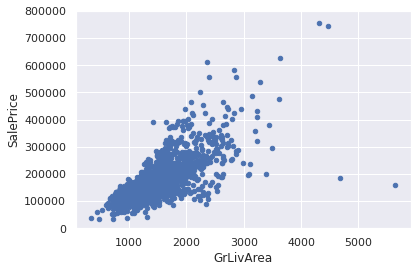

In [17]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

- two value with bigger 'GrLivArea' 데이터가 정상처럼 보이지 않음. 이는 아마 농촌 지역이라 가격이 낮지 않을까하는 예상이 됨. 일반적인 경우를 보여주는 데이터는 아닐 것이므로, 둘을 outlier로 생각해 삭제하고자 함.
- 우측 상단의 2점은 아까 조심해서 확인해봐야 한다고 했던 observation임. 하지만 trend를 잘 따르는 것으로 확인이 되니 유지할 것임.

In [18]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending=False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


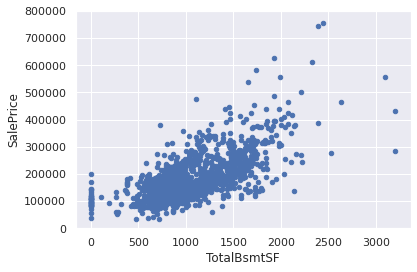

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000));

`TotalBsmtSF` > 3000 인 observation을 삭제해야될 것처럼 보이기도 하지만, 별 효과없을 것 같아 냅두기로 한다.

### Getting hard core


#### 4가지 가정을 테스트해보자

- **정규화** : 데이터가 정규 분포 모양으로 그려지는지 확인해본다. 각 피처들의 분포가 정규 분포이도록 바꿔보자.

- **동분산(Homoscedasticity)** : 동분산은 종속 변수가 비슷한 수준의 분산을 갖는 것을 의미한다. 다양한 인풋에 대해 손실값이 비슷한 수준일 수 있도록 만들어주는 가정이다.

- **선형성(Linearity)** : 가장 쉬운 방법은 scatter 그래프를 그린 뒤, 선형 패턴이 있는지를 파악하는 것이다. 

- **상관관계가 있는 손실 제거 (Absence of correlated errors)** : 상관관계가 있는 손실이란 하나의 에러가 다른 에러를 발생시키는 상황을 의미한다.

#### 정규화 가정 탐색
- 히스토그램 : Kurtosis and skewness
- 정규 분포 그래프 : 데이터 분포가 정규 분포를 비슷하게 따르는지 확인해보자

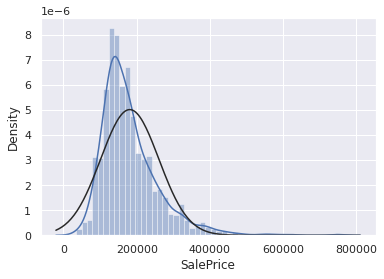

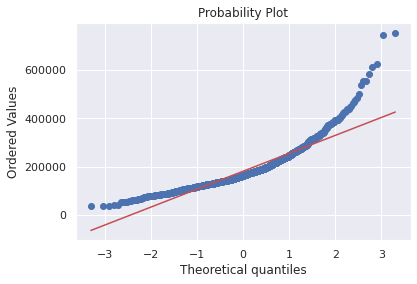

In [20]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

#### 정규화를 위한 유용한 기술!
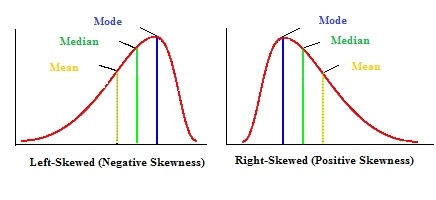

**Positive skewness(왼쪽으로 치우친 형태, right skew라고도 부름) 상황에서, log 변환을 취하면 매우 잘된다!**
median을 기준으로, 더 높은 값들은 log transformation을 통해 median과 비슷한 값으로 바뀐다. 반면에 낮은 값들은 log 함수의 특성상 median으로부터 멀어지는 분산된 값을 받게 된다.

**Negative skewness(left skew)의 경우 power 변환(or exponentating)이 더 잘 통한다.**
아니면 데이터에 obvious upper bound가 존재한다면, upper bound에서 값을 빼 right skew 데이터로 만든 후 log transformation을 취하기도 한다.

In [21]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

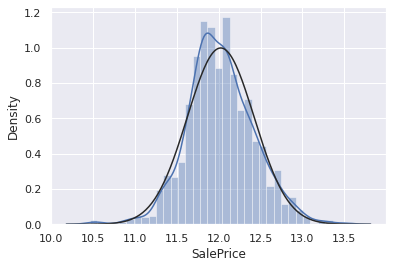

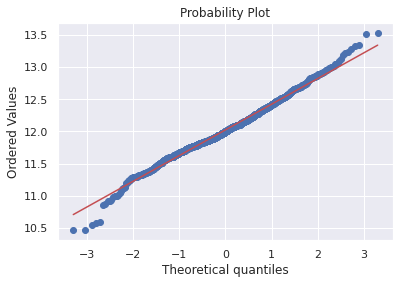

In [22]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

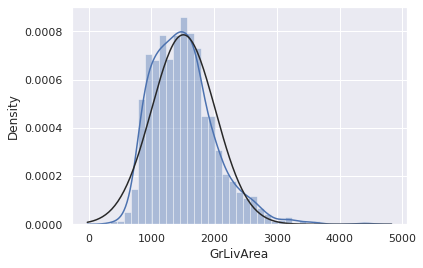

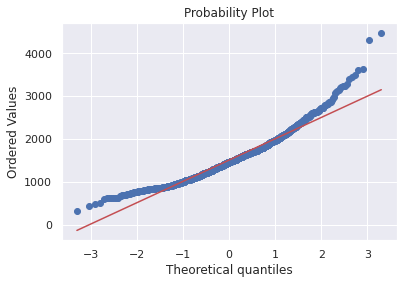

In [23]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [24]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

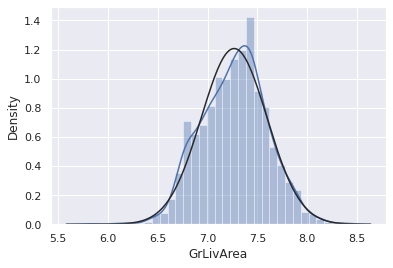

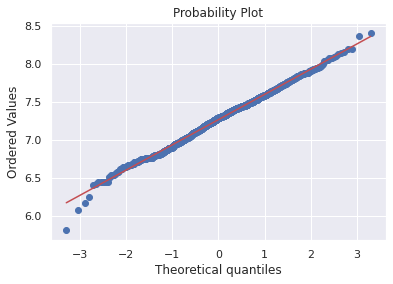

In [25]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

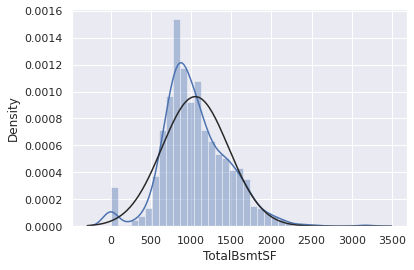

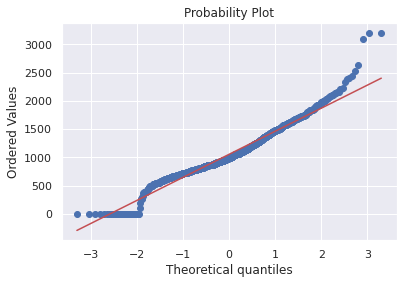

In [26]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

#### 위 상황에서 문제가 발생함!
- Skewness가 발생한 'TotalBsmtSF' 피처에 대해서 로그 변환을 취할 수가 없음.
- 이는 (houses without basement)의 관측들이 0의 값을 보이기 때문에, 로그 변환이 불가능함.

따라서, basement를 갖냐 안갖냐의 영향을 보기 위해 새로운 binary 변수를 만들어준다. 이러면 basement를 가진 샘플들 중에서 'TotalBsmtSF' 값에 대한 로그 변환을 취해 정규화가 가능해진다.

In [27]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [28]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

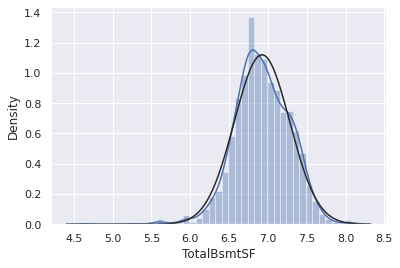

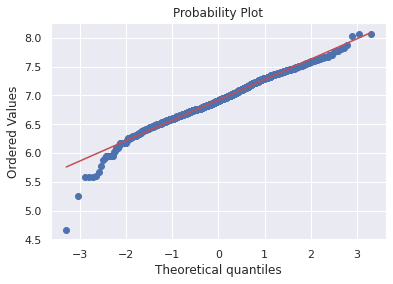

In [29]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

#### 동분산 탐색

그래프를 그려 두 피처의 동분산 가정이 지켜지는지를 파악하는 것이 가장 좋은 방법이다. 이 때, **conic shape와 diamond shape를 피해야 homoscedasticity를 만족하는 것이다.**

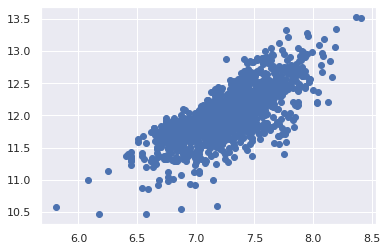

In [30]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Normality 변형 전에는 conic shape였는데, normality를 만족하고 나니 자연스럽게 homoscedasticity 문제도 해결되었다!

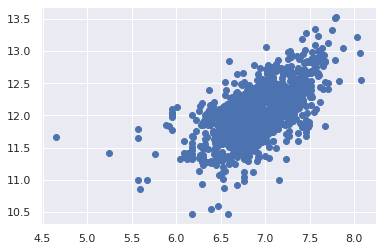

In [31]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [32]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

## 결론

지금까지 어떤 피처가 학습에 도움이 되고, 필요없는 피처들, 손실 데이터, 또는 아웃라이어를 제거하는 전처리 과정을 거쳤습니다. 또한 다양한 가정들을 테스트하고, 로그 변환을 취해주거나 범주형 변수들을 더미 변수로 치환해주는 작업들을 진행했습니다. 이제 정제한 데이터를 저장한 이후에, 앙상블 모델로 학습하고 성능을 평가해주세요.

In [33]:
df_train.drop(['Id'], axis=1, inplace=True)

y = df_train.SalePrice.reset_index(drop=True)
X = df_train.drop(['SalePrice'], axis=1)

In [34]:
X.to_csv('./data/preprocessed_X.csv', index=False)
y.to_csv('./data/preprocessed_y.csv', index=False)